In [52]:
import seaborn as sns
from matplotlib import pyplot as plt
import os

def find_files(fileptr, search_path):
    
    result = []
    # Wlaking top-down from the root
    for root, dir, files in os.walk(search_path):
        for f_name in files:
            if fileptr in f_name:
                result.append(f_name)
    
    result.sort()
    return result
nExp = 36

dir_exp = './OutPlots/'
file_name = '{}-Desc_Beam'.format(nExp)

all_files = find_files(file_name, dir_exp)
enumerate_files = list(enumerate(all_files, start=1))
enumerate_files.append((0,"Exit"))


In [53]:
import numpy as np
from pandas import DataFrame 

def get_instance(file_path):
    index_apertures = 0
    intensity = None
    ID_BEAM = None
    intensity_matrix = []
    current_aperture = []
    instance_content = {
                        'Score': 0,
                        'Beam': None,
                        'Intensity': None, 
                        'Apertures': {},
                        'Intensities': {}
                        }

    complete_file = open (file_path, 'r')

    on_intensity = True
    for line in complete_file.readlines():

        line = line.strip().split(',')
        if len(line) < 2:
            continue

        

        if line[0] == 'Aperture':
            on_intensity = False

        if on_intensity:

            if line[0] == 'Beam':
                ID_BEAM = int(line[1])
                instance_content['Beam'] = ID_BEAM
            elif line[0] == 'Score':
                instance_content['Score'] = float(line[1]) 
            else:
                line.pop()
                row = np.array([float(x) for x in line])
                intensity_matrix.append(row)
        else:

            if line[0] == 'Aperture':

                if index_apertures != 0:
                    current_aperture = DataFrame(np.matrix(current_aperture))
                    instance_content['Apertures'][index_apertures-1] = current_aperture
                    instance_content['Intensities'][index_apertures-1] = intensity
                    current_aperture = []

                intensity = float(line[1])
                index_apertures+=1    

            else:
                line.pop()
                row = np.array([float(x) for x in line])
                current_aperture.append(row)

    intensity_frame = DataFrame(np.matrix(intensity_matrix))
    current_aperture = DataFrame(np.matrix(current_aperture))
    instance_content['Intensity'] = intensity_frame
    instance_content['Apertures'][index_apertures-1] = current_aperture
    instance_content['Intensities'][index_apertures-1] = intensity

    return instance_content

AVAILABLES FILES:
1 - 36-Desc_Beam0.txt
2 - 36-Desc_Beam140.txt
3 - 36-Desc_Beam210.txt
4 - 36-Desc_Beam280.txt
5 - 36-Desc_Beam70.txt
0 - Exit


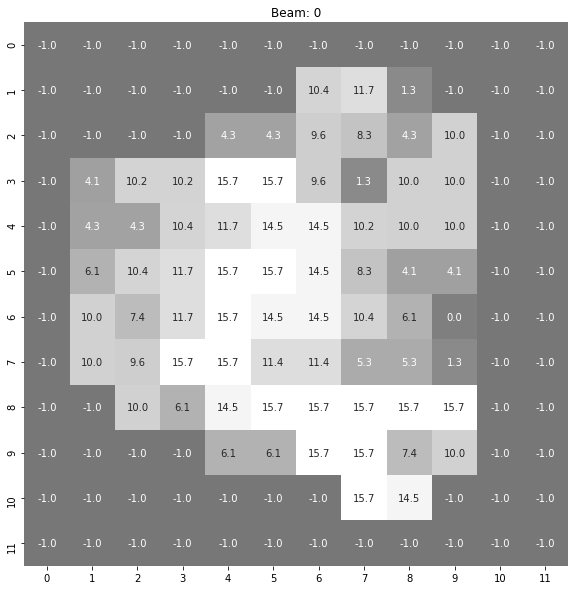

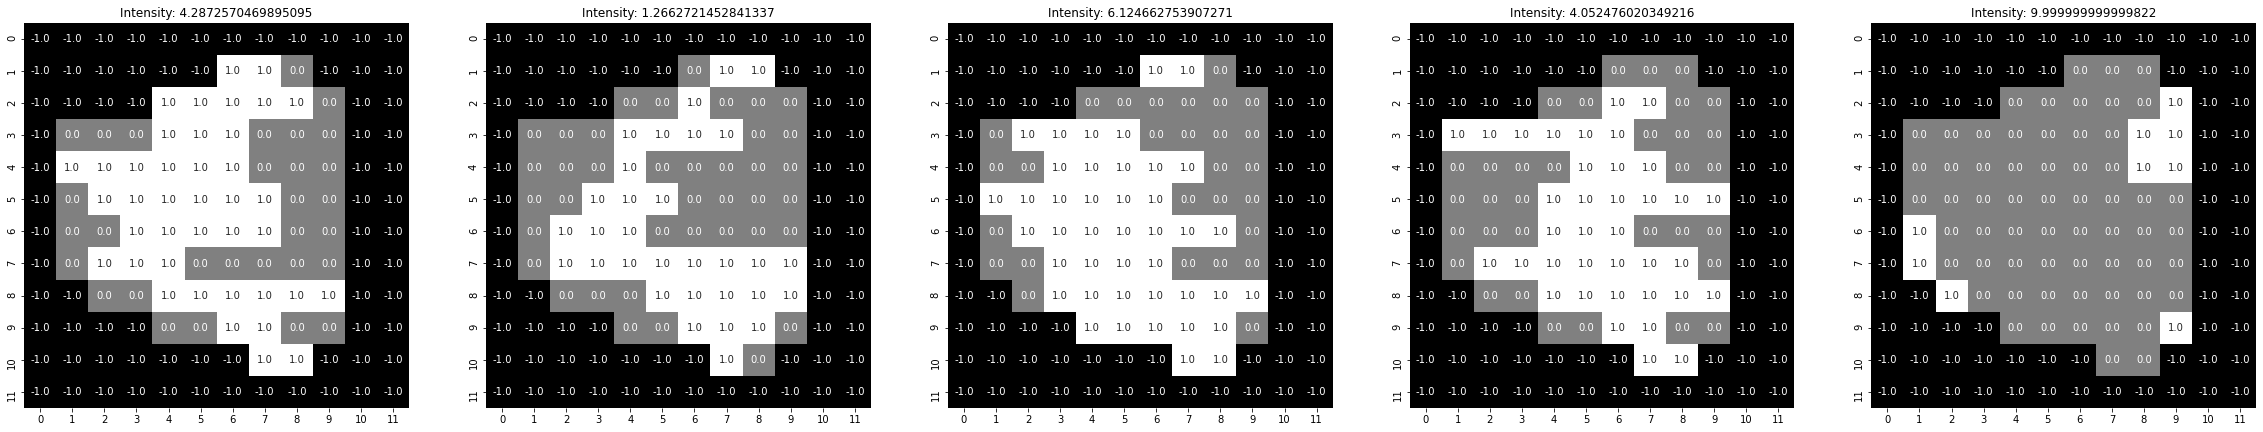

AVAILABLES FILES:
1 - 36-Desc_Beam0.txt
2 - 36-Desc_Beam140.txt
3 - 36-Desc_Beam210.txt
4 - 36-Desc_Beam280.txt
5 - 36-Desc_Beam70.txt
0 - Exit


In [54]:
budget = True

while budget:
    print("AVAILABLES FILES:")
    for index, files in enumerate_files:
        print("{} - {}".format(index,files))

    try:
        option = int(input("File Option"))
    except ValueError:
        print("ERROR Option")
        continue

    if option == 0:
        budget=False
        break
    else:

        file_option = enumerate_files[option-1]
        dir_file = dir_exp + file_option[1]
        instance_content = get_instance(dir_file)
        colors = sns.color_palette("gray", as_cmap=True)

        # Grafica de la Matriz de intensidad
        fig_intensity, ax_intensity = plt.subplots(1,1, figsize=(10,10))
        sns.heatmap(instance_content['Intensity'], center=0, cmap=colors, \
                    annot=True, fmt='.1f', ax=ax_intensity, cbar=False, square=True)
        ax_intensity.set_title('Beam: {}'.format(instance_content['Beam']))        

        # Grafica de conjunto de aperturas con sus intensidades
        index_apertures = instance_content['Apertures'].keys()
        fig, ax =plt.subplots(1,len(index_apertures), figsize=(40,40))

        for index in index_apertures:
            sns.heatmap(instance_content['Apertures'][index], center=0, cmap=colors, \
                        annot=True, fmt='.1f', ax=ax[index], cbar=False, square=True)
            ax[index].set_title('Intensity: {}'.format(instance_content['Intensities'][index]))

        plt.show()

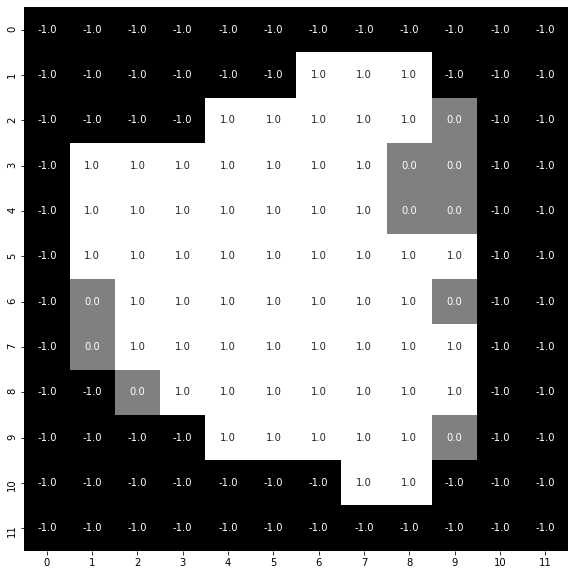

In [55]:
import seaborn as sns

## Plot Aperture
beam_selected = 0
aperture_file = "/TransposedMatrixBeam{}.txt".format(beam_selected)
dir_file = dir_exp + aperture_file

complete_file = open (dir_file, 'r')

on_intensity = True

beam_knowledge = None

transpose_matrix = []
colors = sns.color_palette("gray", as_cmap=True)

for line in complete_file.readlines():
    line = line.strip().split(',')
    ##print(line)
    if line[0] == 'Aperture':
        on_intensity = False
    if on_intensity:
        
        if line[0] == 'Beam':
            ID_BEAM = int(line[1])
            beam_knowledge = ID_BEAM
        
        else:
            line.pop()
            row = np.array([float(x) for x in line])
            #print(row)
            transpose_matrix.append(row)

transpose_matrix.pop()
transpose_matrix = DataFrame(np.matrix(transpose_matrix))
#print(transpose_matrix)

# Grafica de la Matriz de intensidad
fig_intensity, ax_intensity = plt.subplots(1, figsize=(10,10))
sns.heatmap(transpose_matrix, center=0, cmap=colors, annot=True, fmt='.1f', cbar=False, square=True)

plt.show()

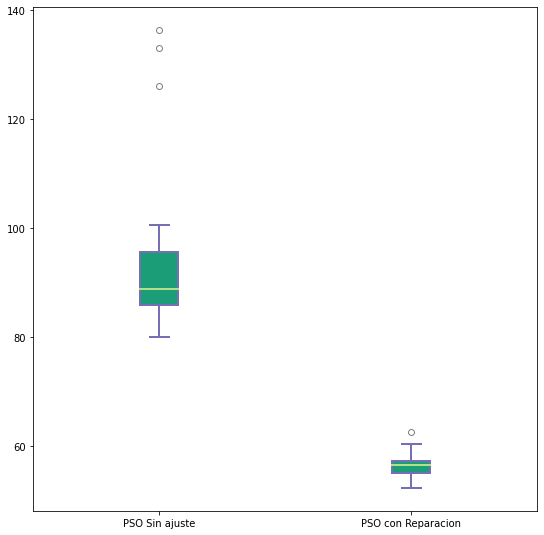

Prom 1: 96.01699499408059
Prom 2: 56.43366252926923
Error 1: 18.632974182521476
Error 2: 2.6300302440913117


In [21]:
import matplotlib.pyplot as plt 
import statistics

pso_neto = [88.71770700827848, 80.11634283263025, 88.0272280156539, 82.11800225330026, 136.46575142268455, 
            88.50497243923036, 93.97812168689833, 87.17094417131707, 100.60147958352908, 133.08302871674778, 
            90.44800784691535, 81.12188020238557, #125.22937552475275, 
            89.95902710221148, 80.9466467006273, 126.13609743328786, #216.1593620504267, #177.2422361188086, #116.28659306572753, 
            88.87668248959187
]

pso_rep = [55.85275845845072, 55.249790968426275, 56.67296707689738, 56.498409087052394, 57.43230842622619, 56.542383854746674, 
           56.91227049878454, 52.3643530239054, 62.698750089731725, 56.93175929799373, 53.48256298986116, 54.29579157891398, 
           57.31668848358559, 52.71038658045473, 60.34517775687793, 57.63224229639922]

data = [pso_neto, pso_rep]

fig = plt.figure(figsize =(7, 7))

ax = fig.add_axes([0, 0, 1, 1])
colors = ['#0000FF', '#00FF00']

bp = ax.boxplot(data, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_xticklabels(['PSO Sin ajuste', 'PSO con Reparacion'])
ax.set_label('z(x)')

plt.show()

prom_1 = statistics.mean(pso_neto)
prom_2 = statistics.mean(pso_rep)

print("Prom 1: {}".format(prom_1))
print("Prom 2: {}".format(prom_2))


error_1 = statistics.stdev(pso_neto)
error_2 = statistics.stdev(pso_rep)

print("Error 1: {}".format(error_1))
print("Error 2: {}".format(error_2))


In [23]:
a = [13, 16, 13, 14, 10, 12, 16, 12, 12, 13, 15, 16, 14, 12, 15, 12]

print(statistics.mean(a))

13.4375
